**Analysing the classes iris_setosa and iris_versicolor**

Importing libraries and Taking Input of Dataset

<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


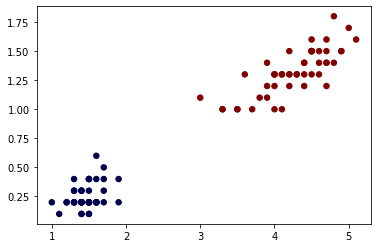

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')
print(type(X))
print(y)



---



---



---



Method to Plot Support Vector Machine given the model and data set

In [2]:
def plot_svm_boundary(model,X,y):

    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy)
    # print(Z)
    Z=Z.reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

Attributes needed in the building Margin ( Hyperplane )

coefficients in the Dual problem : 
 [[-1.1764704  1.1764704]]
coefficients in the primal problem : 
 [[1.29411744 0.82352928]]
 Number of support vectors with respect to classes : 
 [1 1]
Support vectors : 
 [[1.9 0.4]
 [3.  1.1]]
Constants in decision function : [-3.78823471]


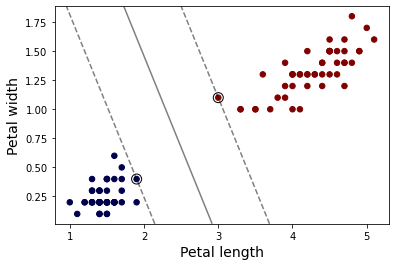

In [3]:
# SVM Classifier model
model = SVC(kernel="linear", C=1000)
model.fit(X, y)
print("coefficients in the Dual problem : \n",model.dual_coef_)

print("coefficients in the primal problem : \n",model.coef_)

print(" Number of support vectors with respect to classes : \n",model.n_support_)

print("Support vectors : \n",model.support_vectors_)

print("Constants in decision function :",model.intercept_)

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plot_svm_boundary(model,X,y)



---



---



---



Margin Using L2 Form

coefficients in the L2 problem : 
 [[-1.00000000e+03 -1.00000000e+03 -2.32703623e+02 -1.00000000e+03
  -1.00000000e+03 -7.60054938e+02  1.00000000e+03  1.00000000e+03
   9.92197913e+02  5.60648323e-01  1.00000000e+03  1.00000000e+03]]
 Number of support vectors with respect to classes : 
 [6 6]
Support vectors : 
 [[4.7 1.6]
 [4.8 1.8]
 [4.9 1.5]
 [5.  1.7]
 [5.1 1.6]
 [4.5 1.6]
 [4.5 1.7]
 [5.  1.5]
 [4.8 1.8]
 [4.9 1.8]
 [5.1 1.5]
 [4.8 1.8]]
Constants in decision function : [10.2450385]


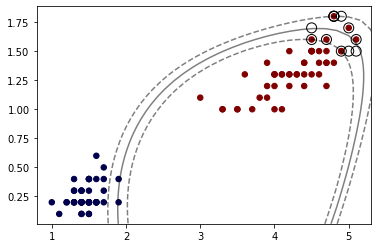

In [21]:
from sklearn import svm
L2_svm =svm.LinearSVC(C=1e-10,penalty="l2", loss="squared_hinge", dual=False)
L2_svm.fit(X_train, y_train)

ypred = L2_svm.predict(X_test)
print("coefficients in the L2 problem : \n",model.dual_coef_)

print(" Number of support vectors with respect to classes : \n",model.n_support_)

print("Support vectors : \n",model.support_vectors_)

print("Constants in decision function :",model.intercept_)
plot_svm_boundary(model,X,y)

Support Vector Machine using Kernel = " Poly "

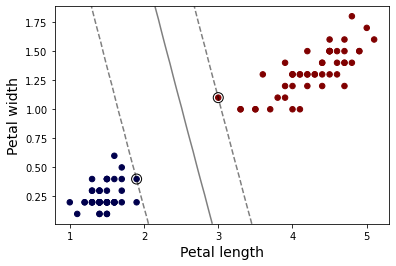

In [4]:
model = SVC(kernel="poly", C=1000)
model.fit(X, y)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plot_svm_boundary(model,X,y)

Support Vector Machine using Kernel = " RBF "

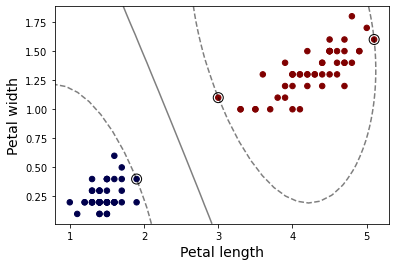

In [5]:
model = SVC(kernel="rbf", C=1000)
model.fit(X, y)

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plot_svm_boundary(model,X,y)



---



---



---




**Analysing the classes iris_versicolor and iris_virginica**

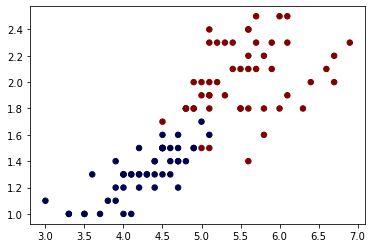

In [6]:
iris = datasets.load_iris()
XX = iris["data"][:, (2, 3)]  # petal length, petal width
yy = iris["target"]


setosa_or_versicolor = (yy == 1) | (yy == 2)
XX = XX[setosa_or_versicolor]
yy = yy[setosa_or_versicolor]

plt.scatter(XX[:, 0], XX[:, 1], c=yy, s=30,cmap='seismic')

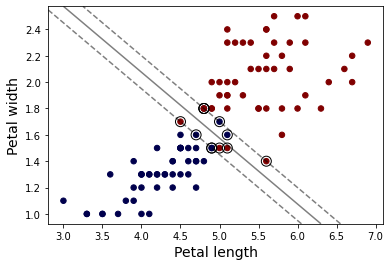

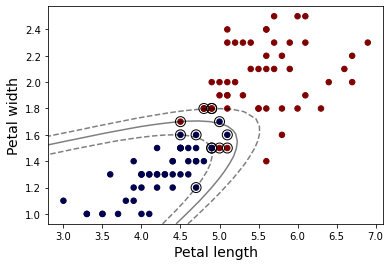

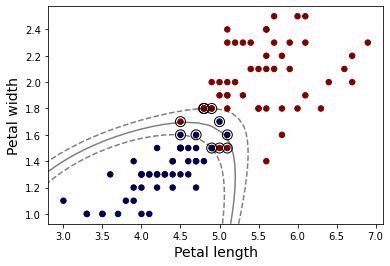

In [7]:
model = SVC(kernel="linear", C=1000)
model.fit(XX, yy)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plot_svm_boundary(model,XX,yy)

model = SVC(kernel="poly", C=1000)
model.fit(XX, yy)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plot_svm_boundary(model,XX,yy)

model = SVC(kernel="rbf", C=1000)
model.fit(XX, yy)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plot_svm_boundary(model,XX,yy)

**Accuracy and Error Calculation**

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score,f1_score,recall_score, accuracy_score
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size = 0.20, random_state = 82)

def print_info(y_pred):   
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix : ")
    print(cm)
    a = cm.shape
    corrPred = 0
    falsePred = 0
    
    for i in range(a[0]):
        for c in range(a[1]):
            if i == c:
                corrPred +=cm[i,c]
            else:
                falsePred += cm[i,c]
    print('\n Correct predictions : ', corrPred)
    print('\n False predictions : ', falsePred)
    kernelRbfAccuracy = corrPred/(cm.sum())
    
    print ('\n Accuracy of the SVC Clasification is : ', corrPred/(cm.sum()))
    
    print("\nClassification Report : \n", classification_report(y_test, y_pred))

    print("\nprecision.. ",precision_score(y_test, y_pred))

    print("\nf1 score.. ",f1_score(y_test, y_pred))
    print("\nRecall  ",recall_score(y_test, y_pred))
    print("\nAccuracy.. ",accuracy_score(y_test, y_pred))
    
    
    

In [9]:

#Fitting Training Dataset to the Support Vector Classifier with kernel = "linear" and C = 1000
print("Training Dataset to the Support Vector Classifier with kernel = ""linear"" and C = 1000")
svcclassifier = SVC(kernel = 'linear', random_state = 0, C = 1000)
svcclassifier.fit(X_train, y_train)
y_pred = svcclassifier.predict(X_test)
print(y_pred)
print_info(y_pred)

Training Dataset to the Support Vector Classifier with kernel = linear and C = 1000
[2 2 2 1 2 2 2 2 1 1 1 1 1 1 1 1 1 2 1 1]
Confusion Matrix : 
[[12  1]
 [ 0  7]]

 Correct predictions :  19

 False predictions :  1

 Accuracy of the SVC Clasification is :  0.95

Classification Report : 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20


precision..  1.0

f1 score..  0.9600000000000001

Recall   0.9230769230769231

Accuracy..  0.95


In [10]:

#Fitting Training Dataset to the Support Vector Classifier with kernel = "poly" and C = 1000
print("Training Dataset to the Support Vector Classifier with kernel = ""poly"" and C = 1000")
svcclassifier = SVC(kernel = 'poly', random_state = 0 , C = 1000)
svcclassifier.fit(X_train, y_train)
y_pred = svcclassifier.predict(X_test)
print(y_pred)
print_info(y_pred)

Training Dataset to the Support Vector Classifier with kernel = poly and C = 1000
[2 2 2 1 2 2 2 2 1 1 1 1 1 1 1 1 1 2 1 1]
Confusion Matrix : 
[[12  1]
 [ 0  7]]

 Correct predictions :  19

 False predictions :  1

 Accuracy of the SVC Clasification is :  0.95

Classification Report : 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20


precision..  1.0

f1 score..  0.9600000000000001

Recall   0.9230769230769231

Accuracy..  0.95


In [11]:

#Fitting Training Dataset to the Support Vector Classifier with kernel = "poly" and C = 1000
print("Training Dataset to the Support Vector Classifier with kernel = ""RBF"" and C = 1000")
svcclassifier = SVC(kernel = 'rbf', random_state = 0,C=1000)
svcclassifier.fit(X_train, y_train)
y_pred = svcclassifier.predict(X_test)
print(y_pred)
print_info(y_pred)

Training Dataset to the Support Vector Classifier with kernel = RBF and C = 1000
[2 2 2 1 2 2 2 2 1 1 1 1 1 1 1 1 1 2 1 1]
Confusion Matrix : 
[[12  1]
 [ 0  7]]

 Correct predictions :  19

 False predictions :  1

 Accuracy of the SVC Clasification is :  0.95

Classification Report : 
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20


precision..  1.0

f1 score..  0.9600000000000001

Recall   0.9230769230769231

Accuracy..  0.95
